In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('/content/car.csv')

In [3]:
data

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
data.Car_Acceptability.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Car_Acceptability, dtype: int64

In [6]:
X = data.drop(['Car_Acceptability'], axis =1)
y = data.Car_Acceptability

In [7]:
X

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [8]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: Car_Acceptability, Length: 1728, dtype: object

In [9]:
num_features = X.select_dtypes(exclude = "object")
cat_features = X.select_dtypes(include = "object")

Buying_Price         0
Maintenance_Price    0
No_of_Doors          0
Person_Capacity      0
Size_of_Luggage      0
Safety               0
dtype: int64

In [14]:
def remove_outliers(df):
    outliers = {}
    for col in df.columns:
        if str(df[col].dtype) != 'object':
            df = df[np.abs(df[col]-df[col].mean()) < (3*df[col].std())]
            olrs = df[~(np.abs(df[col]-df[col].mean()) < (3*df[col].std()))]
            outliers = pd.DataFrame(olrs)

    return print('These outliers have been removed from your dataset: \n\n', outliers,
                'New shape is:', df.shape)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 20)


In [20]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))

<ipython-input-20-d946359cc912>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


0

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate  # Import the tabulate library


step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(), num_features.columns)
    ],
    remainder='passthrough'
)

In [28]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred,  average="macro")
    f1 = f1_score(y_test, y_pred,  average="macro")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

# Initialize different classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

+------------------------------+------------+-------------+----------+------------+---------------------+
| Model                        |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix    |
+==============================+============+=============+==========+============+=====================+
| Logistic Regression          |   0.901734 |    0.87044  | 0.731715 |   0.781474 | [[ 72   1  12   0]  |
|                              |            |             |          |            |  [  9   6   0   0]  |
|                              |            |             |          |            |  [  7   1 224   0]  |
|                              |            |             |          |            |  [  4   0   0  10]] |
+------------------------------+------------+-------------+----------+------------+---------------------+
| Random Forest Classifier     |   0.901734 |    0.754248 | 0.649008 |   0.683176 | [[ 72   5   8   0]  |
|                              |            | 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


+------------------------------+------------+-------------+----------+------------+---------------------+
| Model                        |   Accuracy |   Precision |   Recall |   F1 Score | Confusion Matrix    |
+==============================+============+=============+==========+============+=====================+
| Gradient Boosting Classifier |   0.988439 |    0.962868 | 0.959594 |   0.960665 | [[232   0   0   0]  |
|                              |            |             |          |            |  [  0  83   2   0]  |
|                              |            |             |          |            |  [  0   1  14   0]  |
|                              |            |             |          |            |  [  0   1   0  13]] |
+------------------------------+------------+-------------+----------+------------+---------------------+


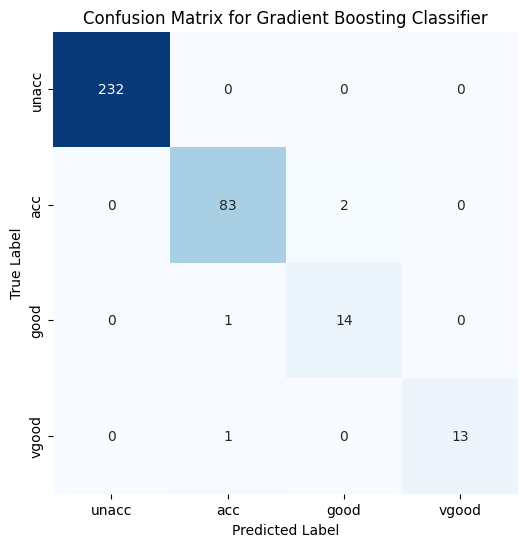

In [85]:
def evaluate_model(model, x_train, y_train, x_test, y_test, class_labels):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    # Use appropriate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred,  average="macro")
    f1 = f1_score(y_test, y_pred,  average="macro")

    # Calculate the confusion matrix with class labels
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)

    return accuracy, precision, recall, f1, cm

# Initialize different classification models
models = {
    'Gradient Boosting Classifier': GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, n_estimators=500)
}


# Specify your class labels (replace with your actual class labels)
class_labels = ['unacc', 'acc', 'good', 'vgood']

# Create a list to store the results
results = []

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test, class_labels)
    results.append([model_name, accuracy, precision, recall, f1, cm])

# Print the results in a tabular form
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Confusion Matrix"]
print(tabulate(results, headers, tablefmt="grid"))

max_accuracy_index = np.argmax([result[1] for result in results])
best_model_name = results[max_accuracy_index][0]
# print(f"\nThe model with the highest accuracy is: {best_model_name} (Accuracy: {results[max_accuracy_index][1]:.4f})")

# Plot confusion matrix with class labels, emphasizing diagonals
plt.figure(figsize=(6, 6))
sns.heatmap(results[max_accuracy_index][-1], annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels, vmin=0, vmax=results[max_accuracy_index][-1].diagonal().max()+10)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


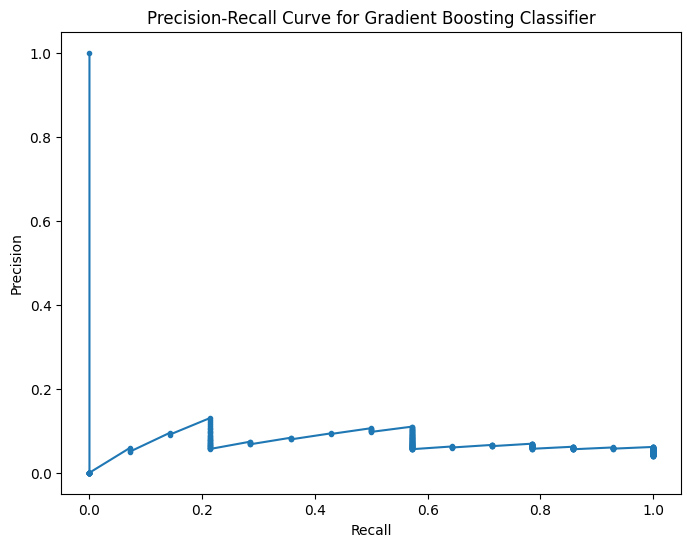

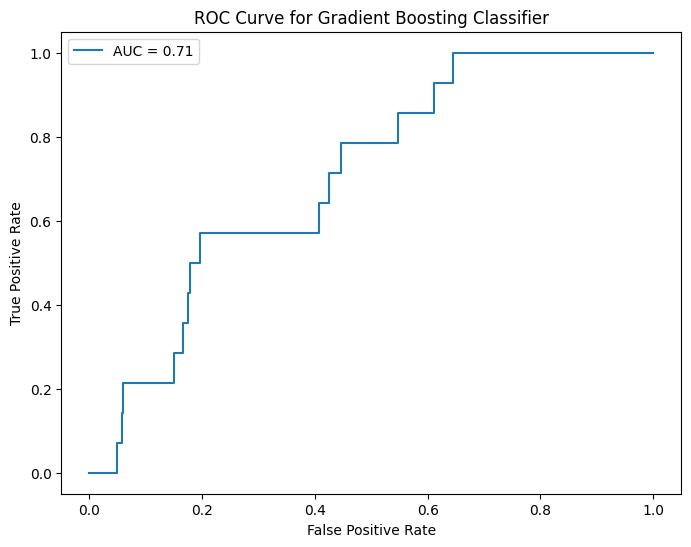

In [86]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# ... (previous code)

pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

# Evaluate and print classification metrics for different models
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, x_train, y_train, x_test, y_test, class_labels)
    results.append([model_name, accuracy, precision, recall, f1, cm])

    # Plot Precision-Recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, pipe.predict_proba(x_test)[:, 1], pos_label='vgood')
    plt.figure(figsize=(8, 6))
    plt.plot(recall_curve, precision_curve, marker='.')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, pipe.predict_proba(x_test)[:, 1], pos_label='vgood')
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()




In [88]:
pipe

Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Buying_Price', 'Maintenance_Price', 'No_of_Doors', 'Person_Capacity',
       'Size_of_Luggage', 'Safety'],
      dtype='object')),
                                                 ('num_tnf', StandardScaler(),
                                                  Index([], dtype='object'))])),
                ('model',
                 GradientBoostingClassifier(max_depth=4, n_estimators=500))])

In [89]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(pipe,X,y,cv=kf)


print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Cross Validation Scores are [0.89595376 0.88150289 0.78034682 0.7884058  0.66666667]
Average Cross Validation score :0.8025751863952417


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# Specify categorical and numerical features
categorical_features = cat_features # List of categorical feature column indices or names
numerical_features = num_features   # List of numerical feature column indices or names

# Create transformers
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
numerical_transformer = StandardScaler()

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_features),
        ('numerical', numerical_transformer, numerical_features)
    ],
    remainder='passthrough'
)

# Create the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier())
])

# Define the hyperparameter grid
param_grid = {

    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]

    # Add other hyperparameters as needed
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train1, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best Accuracy:  0.9869748338826977


In [80]:
categorical_columns = cat_features.columns
features_to_encode = x_train[categorical_columns]

# Use pandas get_dummies to one-hot encode
x_train1 = pd.get_dummies(features_to_encode, drop_first=True)

In [81]:
x_train1

,Buying_Price_low,Buying_Price_med,Buying_Price_vhigh,Maintenance_Price_low,Maintenance_Price_med,Maintenance_Price_vhigh,No_of_Doors_3,No_of_Doors_4,No_of_Doors_5more,Person_Capacity_4,Person_Capacity_more,Size_of_Luggage_med,Size_of_Luggage_small,Safety_low,Safety_med
438,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
36,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0
1170,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0
1488,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1474,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
1247,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
271,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1
474,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0


In [82]:
y_train

438     unacc
36      unacc
1170    unacc
1488    unacc
1474      acc
        ...  
924     unacc
1247    unacc
271     unacc
474     unacc
1379    unacc
Name: Car_Acceptability, Length: 1382, dtype: object

In [84]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}